<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Lendo arquivo csv tratado
data = files.upload()

Saving pulsar_data_train_clean.csv to pulsar_data_train_clean.csv


In [3]:
# Obtendo o dataframe do arquivo lido
pulse_star_train = pd.read_csv(next(iter(data.keys())))

ps_df_train = pulse_star_train.copy()

0.0    11375
1.0     1153
Name: target_class, dtype: int64


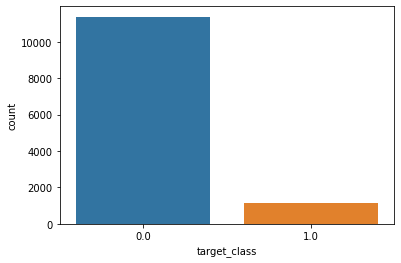

In [14]:
# Verificando balanceamento das classes
print(ps_df_train.target_class.value_counts())
ax = sns.countplot(x="target_class", data=ps_df_train)

In [4]:
# Preparando o train test split
X=ps_df_train.drop("target_class",axis=1)
y=ps_df_train["target_class"]


In [5]:
# Aplicando o train test split com 90% da base para treinamento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 18, test_size = 0.1, stratify=y)


In [6]:
# Aplicando standard scaler no modelo
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

In [9]:
# Método que calcula acurácia do RANDOM FOREST REGRESSOR recebendo um n_estimators
def calculateAccuracyRF(num_estimators):
  
  print("N_Estimator: {}".format(num_estimators)) 
  
  forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=18)
  forest_model.fit(train_X, train_y)

  y_pred_train = forest_model.predict(val_X)

  acuracia = accuracy_score(val_y, y_pred_train.astype(int), normalize=True, sample_weight=None)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(confusion_matrix(val_y,y_pred_train.astype(int)))
  print(classification_report(val_y,y_pred_train.astype(int)))
  print("----------------------------------------------------")

 

In [10]:
for n_estimat in [20,50,100,200,300,500]:
  calculateAccuracyRF(n_estimat)

N_Estimator: 20
Acurácia do teste: 95.61%
[[1135    3]
 [  52   63]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1138
         1.0       0.95      0.55      0.70       115

    accuracy                           0.96      1253
   macro avg       0.96      0.77      0.84      1253
weighted avg       0.96      0.96      0.95      1253

----------------------------------------------------
N_Estimator: 50
Acurácia do teste: 95.61%
[[1136    2]
 [  53   62]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1138
         1.0       0.97      0.54      0.69       115

    accuracy                           0.96      1253
   macro avg       0.96      0.77      0.83      1253
weighted avg       0.96      0.96      0.95      1253

----------------------------------------------------
N_Estimator: 100
Acurácia do teste: 94.97%
[[1136    2]
 [  61   54]]
              precision    recal

In [ ]:
# Modelo REGRESSÃO LOGÍSTICA

In [ ]:
# Modelo de ÁRVORE DE DECISÃO

In [ ]:
# Modelo de REGRESSÃO LINEAR

In [ ]:
# VER STANDARD SCALER
# VER ACURACIA
# OUTROS MODELOS DE PREDIÇÃO